O melhor número de clusters é 3 com um Silhouette Score de 0.4436


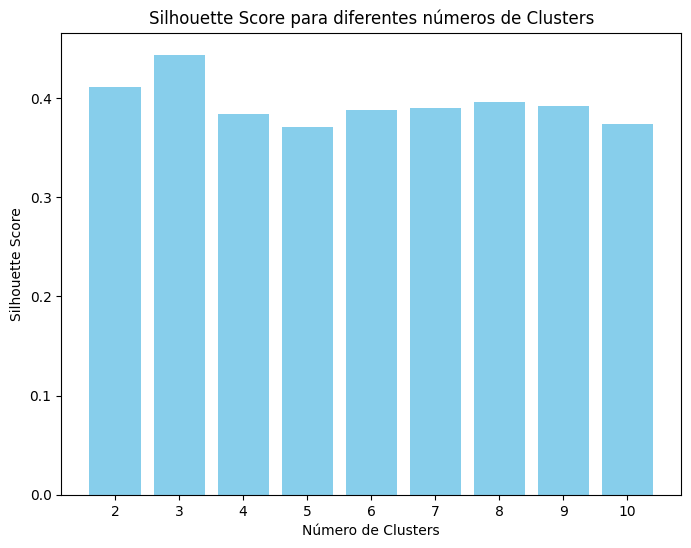

        Age  Annual Income (k$)  Cluster
0  0.019231            0.000000        0
1  0.057692            0.000000        0
2  0.038462            0.008197        0
3  0.096154            0.008197        0
4  0.250000            0.016393        0


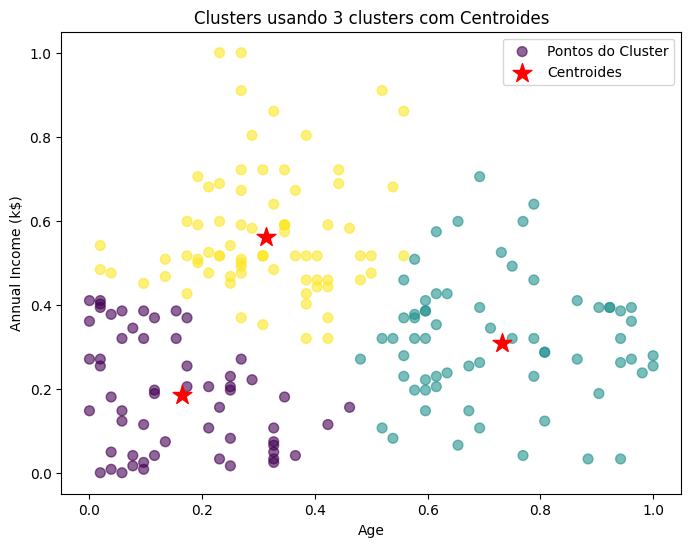

In [20]:
import numpy as np
import pandas as pd
from fcmeans import FCM
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def plot_silhouette_scores(data):
    silhouette_scores = []
    cluster_range = range(2, 11)  # Testar clusters de 2 a 10

    for n_clusters in cluster_range:
        fcm = FCM(n_clusters=n_clusters, random_state=42)
        
        # Garantindo que as colunas 'Age' e 'Annual Income (k$)' sejam numéricas
        data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
        data['Annual Income (k$)'] = pd.to_numeric(data['Annual Income (k$)'], errors='coerce')
        
        # Remover valores nulos, caso existam
        data_clean = data.dropna(subset=['Age', 'Annual Income (k$)'])
        
        # Convertendo para ndarray
        data_values = data_clean[['Age', 'Annual Income (k$)']].values  # Usando .values para garantir ndarray
        fcm.fit(data_values)

        # Atribuindo os clusters e calculando o Silhouette Score
        y_predict = fcm.predict(data_values)
        score = silhouette_score(data_clean[['Age', 'Annual Income (k$)']], y_predict)
        silhouette_scores.append(score)

    # Exibindo o melhor número de clusters
    best_k = cluster_range[silhouette_scores.index(max(silhouette_scores))]
    print(f'O melhor número de clusters é {best_k} com um Silhouette Score de {max(silhouette_scores):.4f}')

    # Gráfico de barras
    plt.figure(figsize=(8, 6))
    plt.bar(cluster_range, silhouette_scores, color='skyblue')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score para diferentes números de Clusters')
    plt.xticks(cluster_range)
    plt.show()

    return best_k

# Treinando com o melhor número de clusters
best_k = plot_silhouette_scores(data)

# Agora vamos treinar o modelo com o melhor número de clusters
fcm = FCM(n_clusters=best_k, random_state=42)

# Garantindo que os dados sejam numéricos e removendo valores nulos
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['Annual Income (k$)'] = pd.to_numeric(data['Annual Income (k$)'], errors='coerce')
data_clean = data.dropna(subset=['Age', 'Annual Income (k$)'])

# Convertendo para ndarray
data_values = data_clean[['Age', 'Annual Income (k$)']].values

# Treinando o modelo com os dados
fcm.fit(data_values)

# Prevendo a pertinência dos dados aos clusters
y_predict = fcm.predict(data_values)

# Atribuindo os dados a seus respectivos clusters
# y_predict já contém os índices de cluster, então podemos usá-los diretamente
data_clean['Cluster'] = y_predict

# Exibindo os primeiros dados com seus clusters
print(data_clean[['Age', 'Annual Income (k$)', 'Cluster']].head())

# Visualizando os clusters com os centroides
plt.figure(figsize=(8, 6))
plt.scatter(data_clean['Age'], data_clean['Annual Income (k$)'], c=data_clean['Cluster'], cmap='viridis', s=50, alpha=0.6, label='Pontos do Cluster')

# Adicionando os centroides no gráfico
centroids = fcm.centers  # Centros dos clusters
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='*', label='Centroides')

# Customizando o gráfico
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title(f'Clusters usando {best_k} clusters com Centroides')
plt.legend()
plt.show()
